Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **5. studenog 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [107]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [108]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50)


### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [109]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [110]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

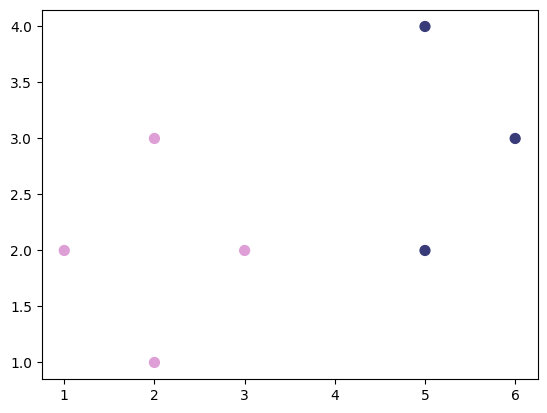

In [111]:
ridge = RidgeClassifier(alpha=0)
ridge.fit(seven_X, seven_y)

seven_y_pred = ridge.predict(seven_X)
error = accuracy_score(seven_y, seven_y_pred)

plot_2d_clf_problem(seven_X, seven_y)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

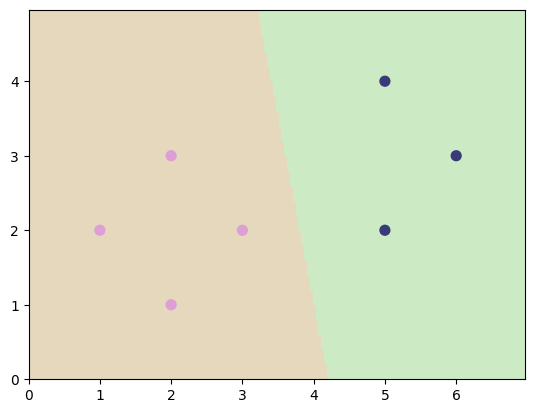

In [112]:
linear = LinearRegression()
linear.fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, h=(lambda x: linear.predict(x.reshape(1, -1)) >= 0.5))



**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?


Granica između klasa bi bila definirana kao $h(\mathbf{x})=0$. To znači da bi primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ bili klasificirani kao pozitivni primjeri, a primjeri za koje vrijedi $h(\mathbf{x})<0$ bili bi klasificirani kao negativni primjeri.

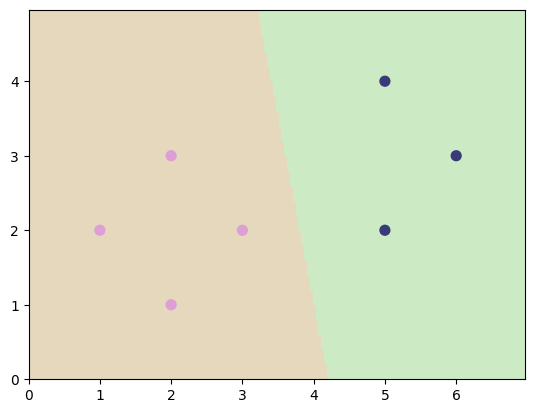

In [113]:
newLabelsY = np.array([1 if i == 1 else -1 for i in seven_y])
newRidge = RidgeClassifier(alpha=0)
newRidge.fit(seven_X, newLabelsY)
plot_2d_clf_problem(seven_X, newLabelsY)

newLinear = LinearRegression()
newLinear.fit(seven_X, newLabelsY)
plot_2d_clf_problem(seven_X, newLabelsY, h=(lambda x : newLinear.predict(x.reshape(1, -1)) >= 0))

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [114]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

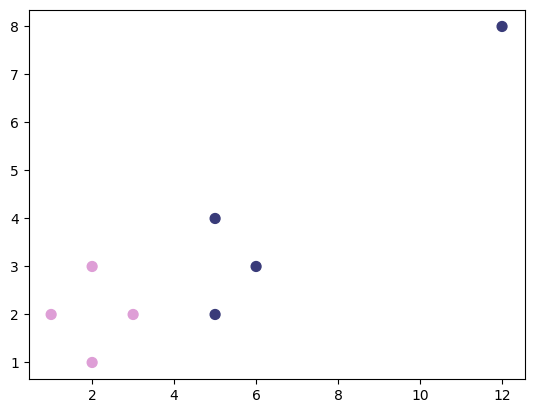

In [115]:
ridge.fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

**A:** ZAto što je model linearne regresije osjetljiv na outliere


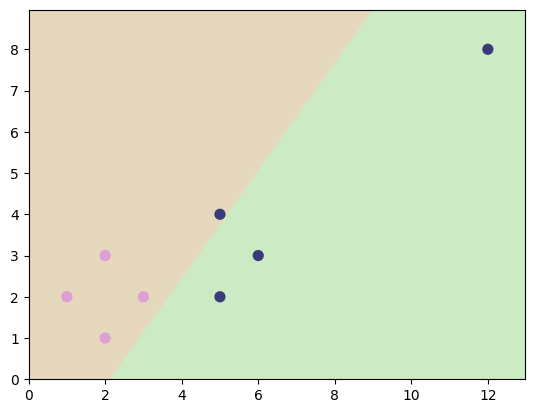

In [116]:
linear = LinearRegression()
linear.fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, h=(lambda x: linear.predict(x.reshape(1, -1)) >= 0.5))

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [117]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

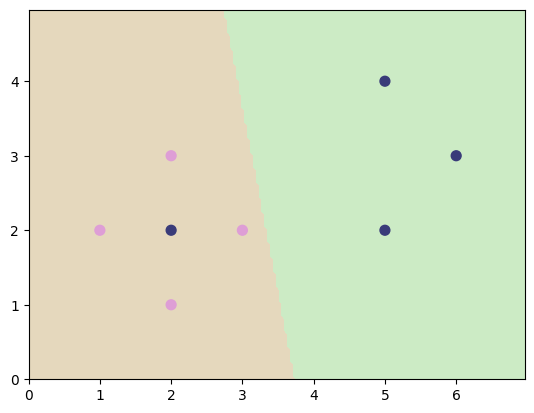

In [118]:
ridge.fit(unsep_X, unsep_y)
plot_2d_clf_problem(unsep_X, unsep_y)
plot_2d_clf_problem(unsep_X, unsep_y, h=(lambda x: ridge.predict(x.reshape(1, -1)) >= 0.5))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

**A:** Problem je u podatcima koji nisu linearno separabilni i modelu koji ovisi o takvoj pretpostavci

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

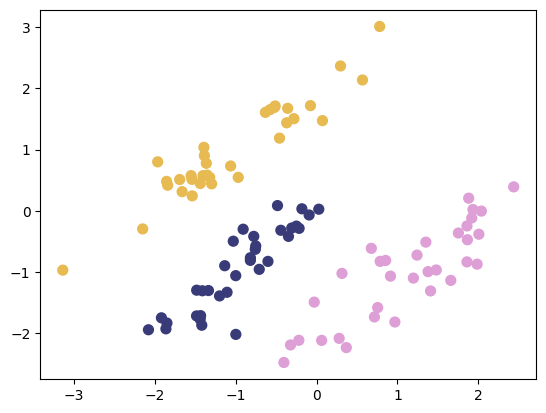

In [121]:
from sklearn.datasets import make_classification

X2, y2 = make_classification(n_classes=3, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
plot_2d_clf_problem(X2, y2)


Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

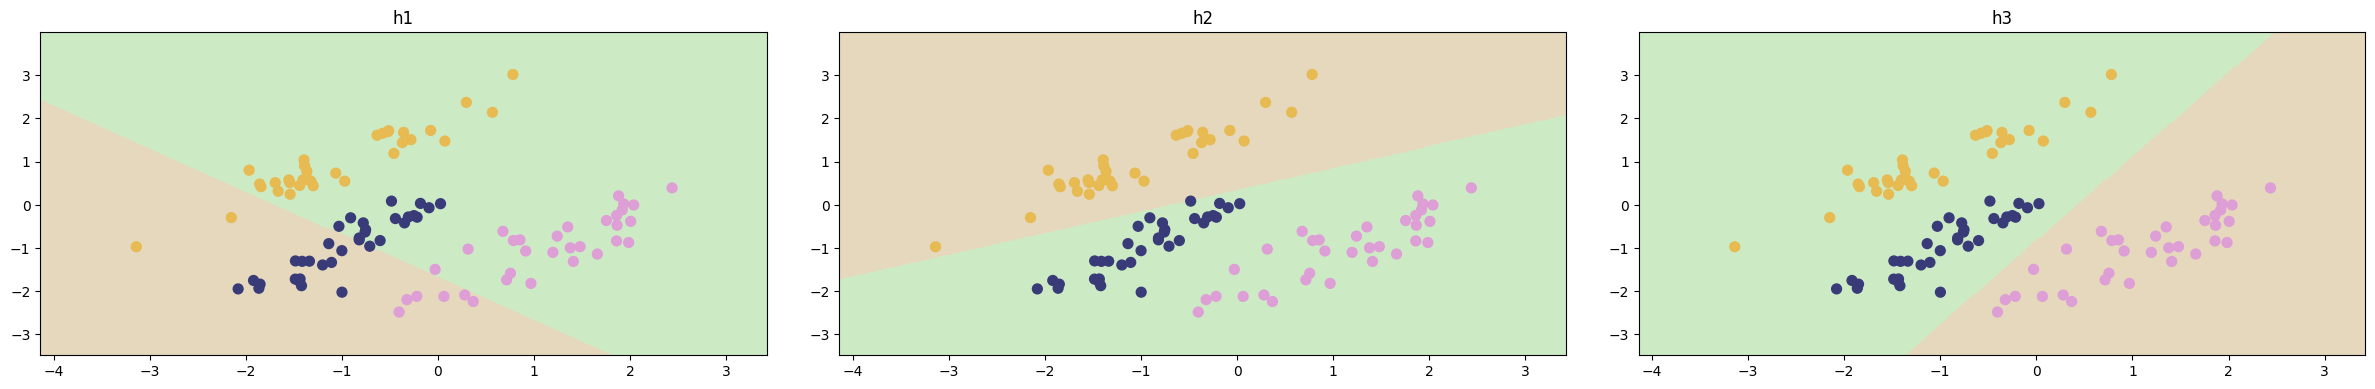

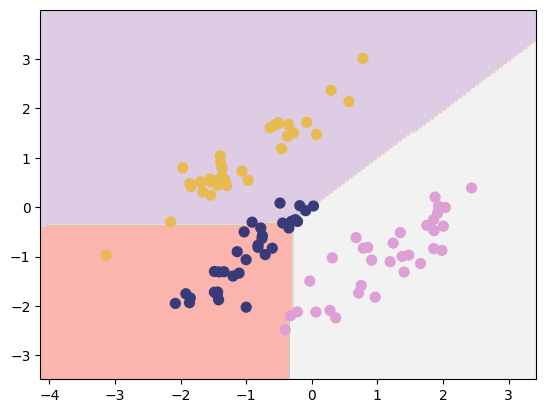

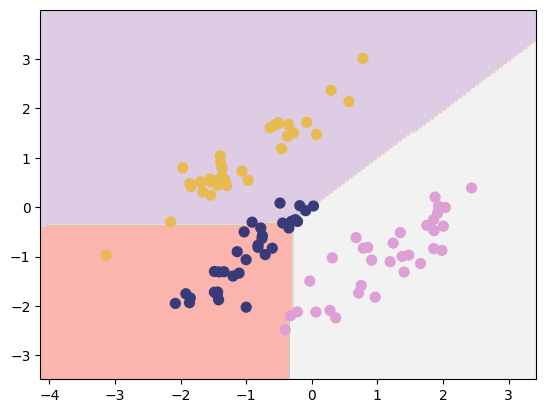

In [150]:
y21 = []; y22 = []; y23 = []

for i in y2:
    if i == 0:
        y21.append(1)
        y22.append(-1)
        y23.append(-1)
    elif i==1:
        y21.append(-1)
        y22.append(1)
        y23.append(-1)
    elif i==2:
        y21.append(-1)
        y22.append(-1)
        y23.append(1)
    else:
        print("error, promjeni broj klasa!")
        break

reg21 = LinearRegression()
reg21.fit(X2, y21)
h21 = lambda x : reg21.predict(x) >= 0

reg22 = LinearRegression()
reg22.fit(X2, y22)
h22 = lambda x : reg22.predict(x) >= 0

reg23 = LinearRegression()
reg23.fit(X2, y23)
h23 = lambda x : reg23.predict(x) >= 0

plt.figure(figsize=(30, 4.2))  # Definira veličinu figure
plt.subplots_adjust(wspace=0.1)  # Prilagođava razmak između subplotova

plt.subplot(1, 3, 1)
plot_2d_clf_problem(X2, y2, h21)
plt.title('h1')

plt.subplot(1, 3, 2)
plot_2d_clf_problem(X2, y2, h22)
plt.title('h2')

plt.subplot(1, 3, 3)
plot_2d_clf_problem(X2, y2, h23)
plt.title('h3')
plt.show()

def h_argmax(X): 
    uvjeti = [reg21.predict(X), reg22.predict(X), reg23.predict(X)]
    return np.argmax(uvjeti, axis=0)


plot_2d_clf_problem(X2, y2, h=h_argmax)
plt.show()

ridge = RidgeClassifier(alpha=0)
ridge.fit(X2, y2)
plot_2d_clf_problem(X2, y2, h=lambda x: ridge.predict(x))
plt.show()



### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

0.5


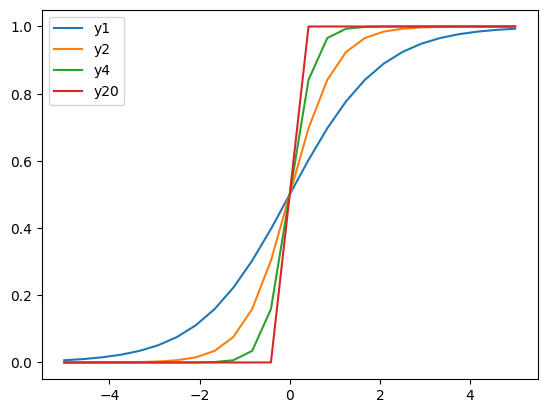

In [173]:
def sigmoid (alpha, x):
    return (1/(1+np.exp(-alpha * x)))

x3a = np.linspace(-5, 5, 25)
y1 = np.array([])
y2 = np.array([])
y4 = np.array([])
y20 = np.array([])
for i in x3a:
    y1 = np.append(y1, sigmoid(1, i))
    y2 = np.append(y2, sigmoid(2, i))
    y4 = np.append(y4, sigmoid(4, i))
    y20 = np.append(y20, sigmoid(20, i))

plt.plot(x3a, y1)
plt.plot(x3a, y2)
plt.plot(x3a, y4)
plt.plot(x3a, y20)
plt.legend(["y1", "y2", "y4", "y20"])
        


**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**A**: Zato što se može derivirati po domeni -inf, +inf, zato sto daje vrijendost <0,1> --> vjerojatnost

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

**A**: Što je veći alpha to više sigmoida poprima oblik step funkcije

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [217]:
import numpy as np

def lr_h(X, w):
    """Hypothesis function for logistic regression."""
    z = X @ w  # Using matrix multiplication operator '@' for clarity
    return 1 / (1 + np.exp(-z))

def cross_entropy_error(X, y, w):
    """Calculate cross-entropy error."""
    h = lr_h(X, w)
    error = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return error

def lr_train(X, y, eta=0.01, max_iter=2000, epsilon=0.0001, trace=False):
    """Train logistic regression model with option to trace errors."""
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    w = np.zeros(X.shape[1])  # Initialize weights
    error_trace = []
    classification_error_trace = []

    for i in range(max_iter):
        h = lr_h(X, w)
        w -= eta * np.dot(X.T, (h - y)) / len(y)  # Update weights
        if trace:
            error_trace.append(cross_entropy_error(X, y, w))
            classification_error_trace.append(np.mean((h > 0.5).astype(int) != y))
        if np.linalg.norm(eta * np.dot(X.T, (h - y)) / len(y)) < epsilon:
            break

    return (w, error_trace, classification_error_trace) if trace else w


### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [218]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Pogreška unakrsne entropije: 0.16370479538480884


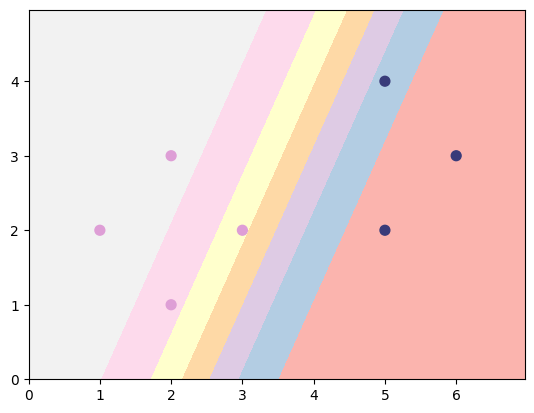

In [219]:
w_seven = lr_train(seven_X, seven_y, eta=0.01, max_iter=5000, epsilon=1e-5)
augmented_seven_X = np.insert(seven_X, 0, 1, axis=1)

# Izračun pogreške unakrsne entropije
error_seven = cross_entropy_error(augmented_seven_X, seven_y, w_seven)
print(f"Pogreška unakrsne entropije: {error_seven}")

# Prikaz granice između klasa
def h_seven(x):
    return lr_h(np.insert(x, 0, 1, axis=1), w_seven)

plot_2d_clf_problem(seven_X, seven_y, h_seven)


**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [220]:
from sklearn.metrics import zero_one_loss

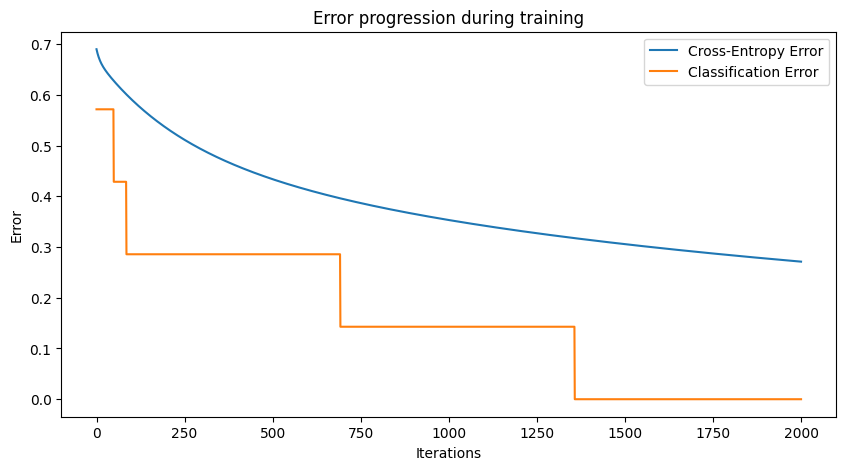

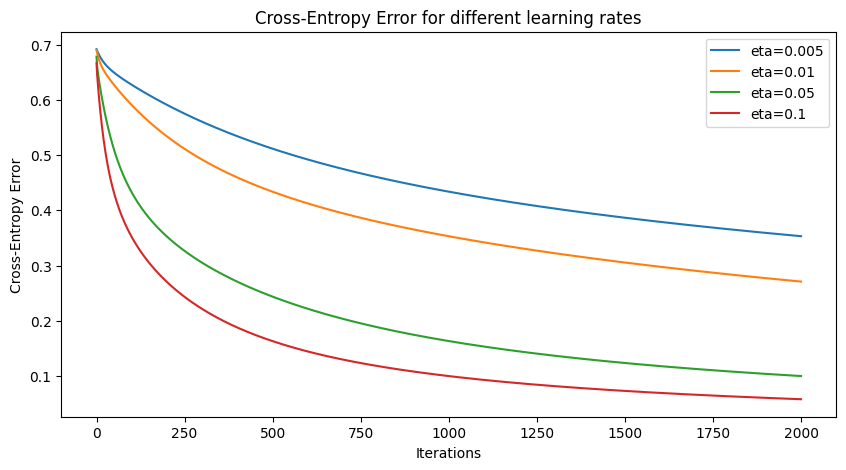

In [226]:
import matplotlib.pyplot as plt

# Train with tracing
w_traced, error_traced, classification_error_traced = lr_train(seven_X, seven_y, eta=0.01, trace=True)

# Plot errors
plt.figure(figsize=(10, 5))
plt.plot(error_traced, label='Cross-Entropy Error')
plt.plot(classification_error_traced, label='Classification Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.title('Error progression during training')
plt.show()

# Now repeat the training for different learning rates and plot the cross-entropy errors

learning_rates = [0.005, 0.01, 0.05, 0.1]
plt.figure(figsize=(10, 5))

for eta in learning_rates:
    _, error_traced, _ = lr_train(seven_X, seven_y, eta=eta, trace=True)
    plt.plot(error_traced, label=f'eta={eta}')

plt.xlabel('Iterations')
plt.ylabel('Cross-Entropy Error')
plt.legend()
plt.title('Cross-Entropy Error for different learning rates')
plt.show()



**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [227]:
from sklearn.linear_model import LogisticRegression

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])  
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])                              

# Train the scikit-learn model
lr_sklearn = LogisticRegression(penalty=None, max_iter=2000)  # No regularization
lr_sklearn.fit(seven_X, seven_y)

# Print the coefficients from scikit-learn model
print("Scikit-learn's logistic regression coefficients:")
print(lr_sklearn.intercept_, lr_sklearn.coef_)

# our own implementation of logistic regression
w_custom = lr_train(seven_X, seven_y) 

# Print the coefficients from your custom model
print("Custom logistic regression coefficients:")
print(w_custom)

# You may also want to compare predictions
print("Scikit-learn's predictions:", lr_sklearn.predict(seven_X))
print("Custom model's predictions:", (lr_h(np.insert(seven_X, 0, 1, axis=1), w_custom) > 0.5).astype(int))




Scikit-learn's logistic regression coefficients:
[46.26968486] [[-14.80304235   4.33454163]]
Custom logistic regression coefficients:
[ 2.05828444 -1.19450687  0.82117034]
Scikit-learn's predictions: [1 1 1 1 0 0 0]
Custom model's predictions: [1 1 1 1 0 0 0]


### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [228]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

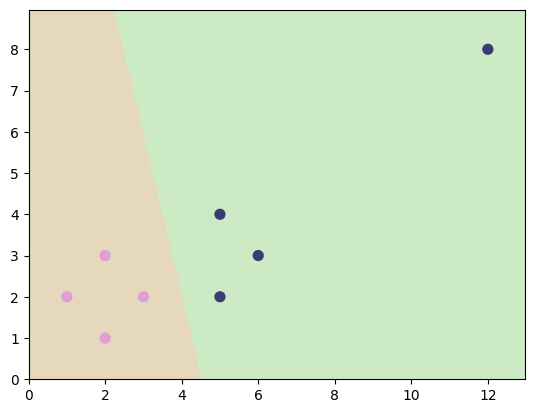

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
log_reg = LogisticRegression()
log_reg.fit(outlier_X, outlier_y)

plot_2d_clf_problem(outlier_X, outlier_y, h= lambda x: log_reg.predict(x) >= 1)


**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

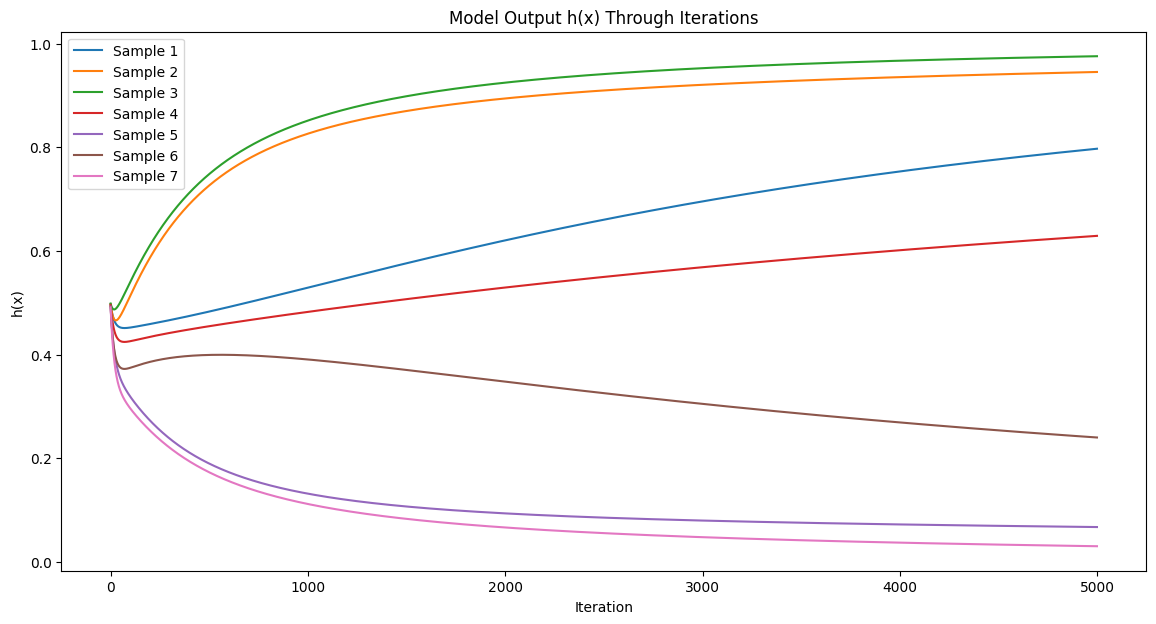

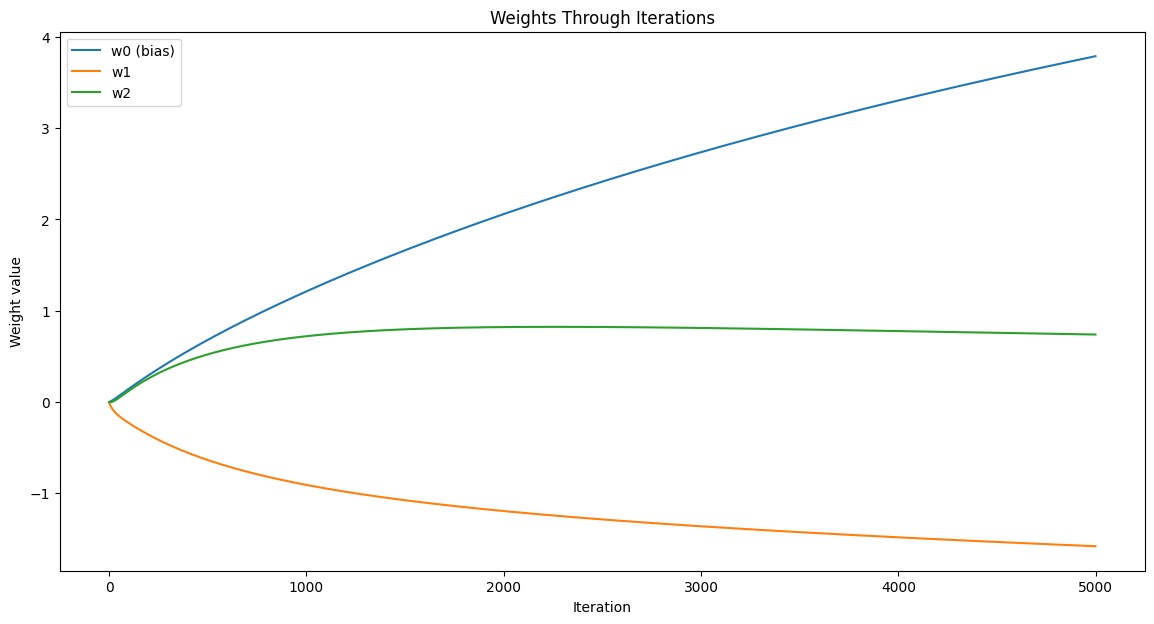

In [244]:
import numpy as np

def lr_train(X, y, eta=0.01, max_iter=2000, epsilon=0.0001, trace=False):
    """Train logistic regression model with option to trace errors."""
    
    X_bias = np.insert(X, 0, 1, axis=1)  
    w = np.zeros(X_bias.shape[1])  
    error_trace = []
    classification_error_trace = []
    weights_trace = []

    for i in range(max_iter):
        h = lr_h(X_bias, w)  
        w -= eta * np.dot(X_bias.T, (h - y)) / len(y)

        if trace:
            weights_trace.append(w.copy())
            error_trace.append(cross_entropy_error(X_bias, y, w))
            classification_error_trace.append(np.mean((h > 0.5).astype(int) != y))

        # Check for convergence
        if np.linalg.norm(eta * np.dot(X_bias.T, (h - y)) / len(y)) < epsilon:
            break

    # If tracing is enabled, return the final weights along with the trace lists
    return (w, weights_trace, error_trace, classification_error_trace) if trace else w


w_final, weights_trace, error_trace, classification_error_trace = lr_train(seven_X, seven_y, eta=0.01, max_iter=5000, epsilon=1e-5, trace=True)

# Make sure seven_X_bias is the input matrix with the bias term added
seven_X_bias = np.insert(seven_X, 0, 1, axis=1)

# Now, use seven_X_bias when calculating h(x) at each iteration
h_trace = [lr_h(seven_X_bias, wt) for wt in weights_trace]
plt.figure(figsize=(14, 7))
for i in range(seven_X.shape[0]):
    plt.plot([ht[i] for ht in h_trace], label=f'Sample {i+1}')
plt.title('Model Output h(x) Through Iterations')
plt.xlabel('Iteration')
plt.ylabel('h(x)')
plt.legend()
plt.show()

weights_trace_array = np.array(weights_trace)

# Plotting the weights through iterations
plt.figure(figsize=(14, 7))
plt.plot(weights_trace_array[:, 0], label='w0 (bias)')
plt.plot(weights_trace_array[:, 1], label='w1')
plt.plot(weights_trace_array[:, 2], label='w2')
plt.title('Weights Through Iterations')
plt.xlabel('Iteration')
plt.ylabel('Weight value')
plt.legend()
plt.show()


### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [246]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

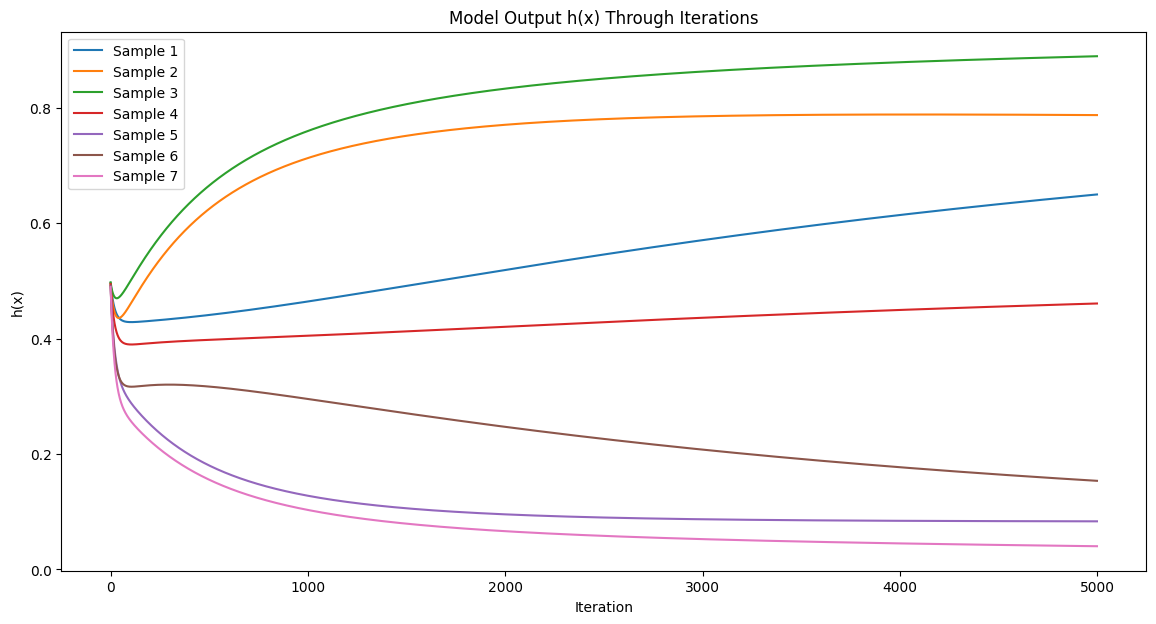

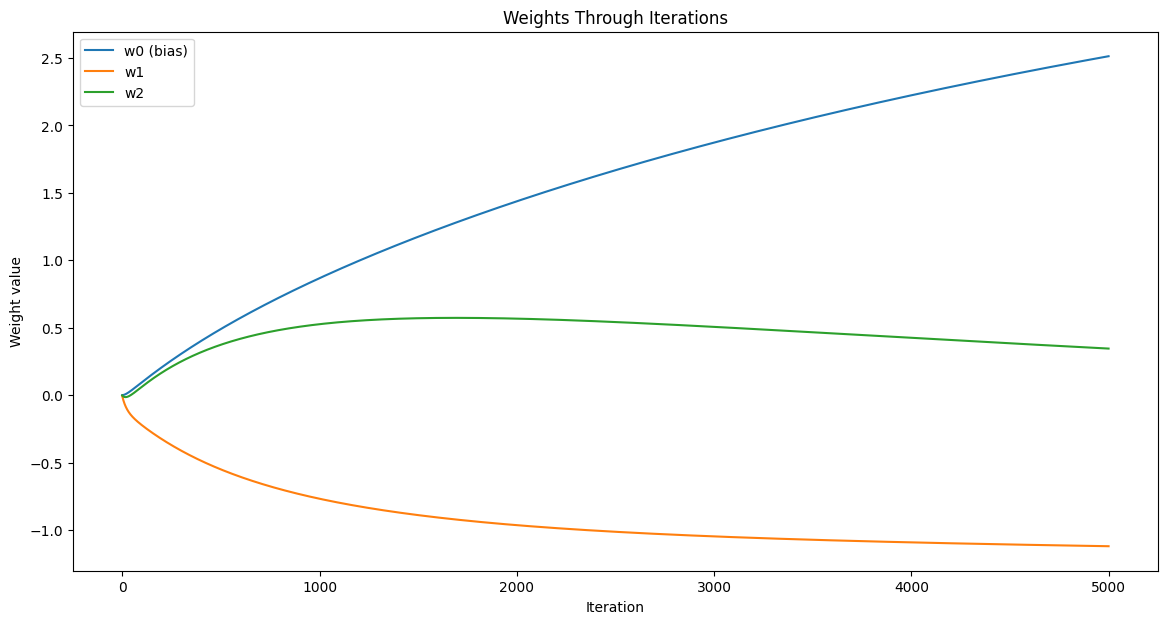

In [247]:
w_final, weights_trace, error_trace, classification_error_trace = lr_train(unsep_X, unsep_y, eta=0.01, max_iter=5000, epsilon=1e-5, trace=True)

# Make sure seven_X_bias is the input matrix with the bias term added
seven_X_bias = np.insert(unsep_X, 0, 1, axis=1)

# Now, use seven_X_bias when calculating h(x) at each iteration
h_trace = [lr_h(seven_X_bias, wt) for wt in weights_trace]
plt.figure(figsize=(14, 7))
for i in range(seven_X.shape[0]):
    plt.plot([ht[i] for ht in h_trace], label=f'Sample {i+1}')
plt.title('Model Output h(x) Through Iterations')
plt.xlabel('Iteration')
plt.ylabel('h(x)')
plt.legend()
plt.show()

weights_trace_array = np.array(weights_trace)

# Plotting the weights through iterations
plt.figure(figsize=(14, 7))
plt.plot(weights_trace_array[:, 0], label='w0 (bias)')
plt.plot(weights_trace_array[:, 1], label='w1')
plt.plot(weights_trace_array[:, 2], label='w2')
plt.title('Weights Through Iterations')
plt.xlabel('Iteration')
plt.ylabel('Weight value')
plt.legend()
plt.show()


**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [248]:
from numpy.linalg import norm

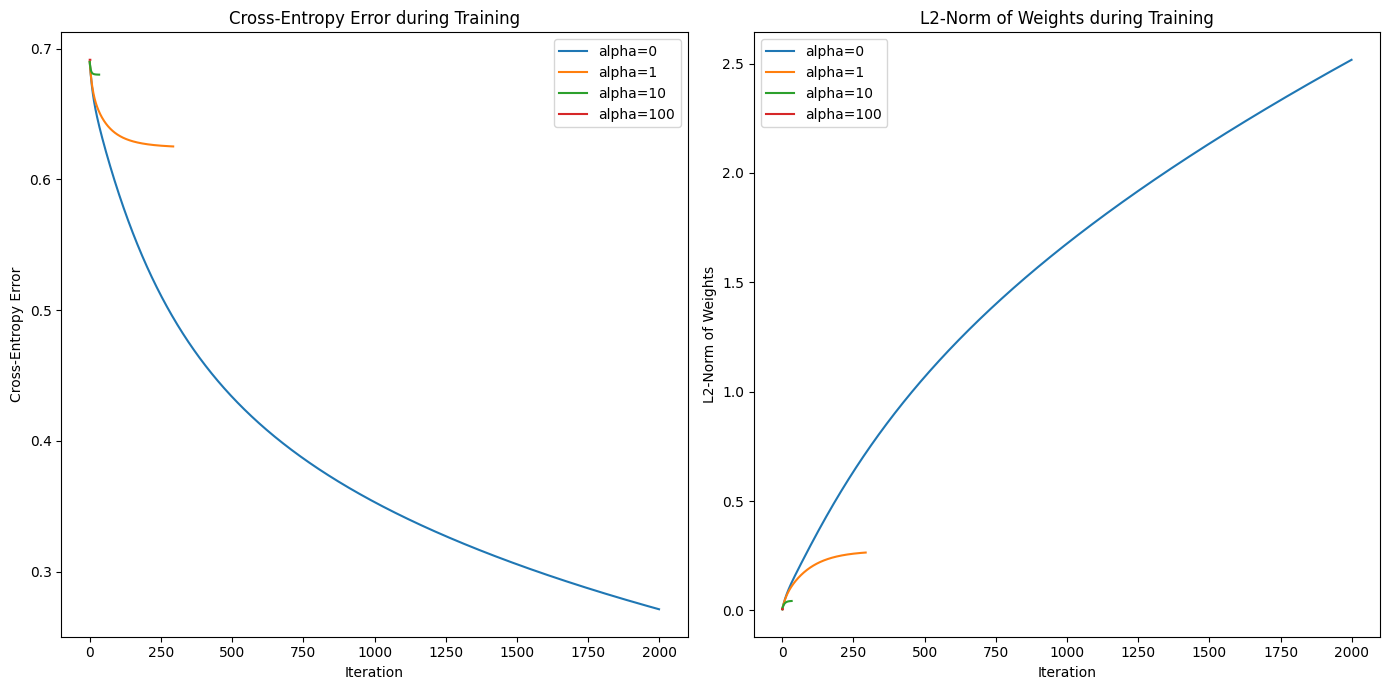

In [250]:
def lr_train_with_l2(X, y, alpha=0, eta=0.01, max_iter=2000, epsilon=0.0001, trace=False):
    """Train logistic regression with L2 regularization."""
    X_bias = np.insert(X, 0, 1, axis=1)  # Add bias term to X
    w = np.zeros(X_bias.shape[1])  # Initialize weights
    error_trace = []
    weight_norm_trace = []
    
    for i in range(max_iter):
        h = lr_h(X_bias, w)  
        gradient = np.dot(X_bias.T, (h - y)) / len(y)  
        gradient += alpha * w  
        w -= eta * gradient  
        
        if trace:
            error_trace.append(cross_entropy_error(X_bias, y, w) + (alpha / 2) * np.dot(w[1:], w[1:])) 
            weight_norm_trace.append(np.linalg.norm(w))
        
        # Check for convergence
        if np.linalg.norm(eta * gradient) < epsilon:
            break
            
    return (w, error_trace, weight_norm_trace) if trace else w


alphas = [0, 1, 10, 100]
traces = {}

# Treniranje modela i prikupljanje tragova za svaku vrijednost alfa
for alpha in alphas:
    _, error_trace, weight_norm_trace = lr_train_with_l2(seven_X, seven_y, alpha=alpha, eta=0.01, max_iter=2000, epsilon=0.0001, trace=True)
    traces[alpha] = (error_trace, weight_norm_trace)

# Crtanje grafova
plt.figure(figsize=(14, 7))

# Graf pogreške unakrsne entropije
plt.subplot(1, 2, 1)
for alpha, (error_trace, _) in traces.items():
    plt.plot(error_trace, label=f'alpha={alpha}')
plt.title('Cross-Entropy Error during Training')
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy Error')
plt.legend()

# Graf L2-norme vektora težina
plt.subplot(1, 2, 2)
for alpha, (_, weight_norm_trace) in traces.items():
    plt.plot(weight_norm_trace, label=f'alpha={alpha}')
plt.title('L2-Norm of Weights during Training')
plt.xlabel('Iteration')
plt.ylabel('L2-Norm of Weights')
plt.legend()

plt.tight_layout()
plt.show()


**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [251]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

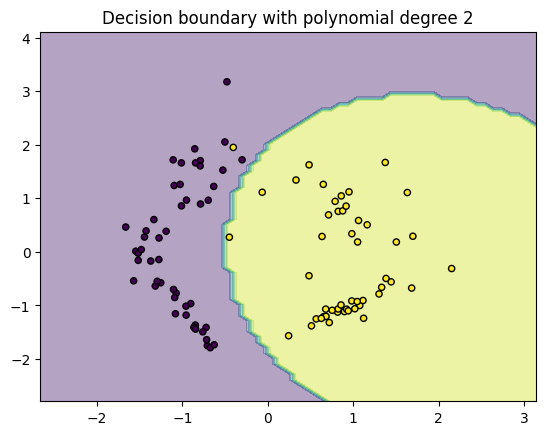

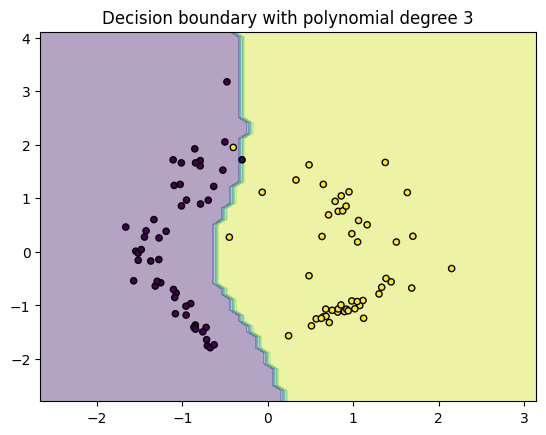

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Generiranje podataka
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=2, flip_y=0,
                           random_state=1)

# Funkcija za treniranje i crtanje
def train_and_plot(X, y, degree):
    # Preslikavanje u prostor viših dimenzija
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # Treniranje modela logističke regresije
    model = LogisticRegression()
    model.fit(X_poly, y)
    
    # Prikaz odlučujuće granice
    plot_decision_boundary(X, y, model, degree)


# Funkcija za crtanje odlučujuće granice
def plot_decision_boundary(X, y, model, degree):
    poly = PolynomialFeatures(degree)
    # Definisanje granica mreže
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predviđanje cjelokupne mreže
    Z = model.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Prikaz granica i podataka
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(f"Decision boundary with polynomial degree {degree}")
    plt.show()

# Treniranje i prikaz za d=2
train_and_plot(X, y, degree=2)

# Treniranje i prikaz za d=3
train_and_plot(X, y, degree=3)



**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?